# Loading package

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import requests
from PIL import Image
import plotly.express as px

# Loading data





In [ ]:
artworks = pd.read_parquet('.../data/Artwork.parquet.gzip')
generated = pd.read_parquet('.../Generated.parquet.gzip')
artistmovements = pd.read_parquet('.../ArtistMovements.parquet.gzip')
artistspecializations = pd.read_parquet('.../ArtistSpecializations.parquet.gzip')
artists = pd.read_parquet('.../Artist.parquet.gzip')
movement = pd.read_parquet('.../Movement.parquet.gzip')
specialization = pd.read_parquet('.../Specialization.parquet.gzip')

# Analyzing data

## Calculate similarity between original images and the corresponding AI images.

In [ ]:
def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [ ]:
# @title import image data from url
def image_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image

In [ ]:
#Imports open_clip and torch
try : 
  import open_clip
except ImportError:
  !pip install open_clip_torch
  import open_clip


try:
  import torch
except ImportError:
  !pip install torch>=1.9.0
  import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which

In [ ]:
#@title Available CLIP Models
# prints all the avaialble clip models
# Choose one of these models :: model name and pretrained 
open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN50-quickgelu', 'openai'),
 ('RN50-quickgelu', 'yfcc15m'),
 ('RN50-quickgelu', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN101-quickgelu', 'openai'),
 ('RN101-quickgelu', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32-quickgelu', 'openai'),
 ('ViT-B-32-quickgelu', 'laion400m_e31'),
 ('ViT-B-32-quickgelu', 'laion400m_e32'),
 ('ViT-B-16', 'openai'),
 ('ViT-B-16', 'laion400m_e31'),
 ('ViT-B-16', 'laion400m_e32'),
 ('ViT-B-16', 'laion2b_s34b_b88k'),
 ('ViT-B-16-plus-240', 'laion400m_e31'),
 ('ViT-B-16-plus-240', 'laion400m_e32'),
 ('ViT-L-14', 'openai'),
 ('ViT-L-14', 'laion400m_e31'),
 ('ViT-L-14', 'laion400m_e32'),
 ('ViT-L-14', 'laion2b_s32b_b82k'),
 ('ViT-L-14-336', 'openai'),
 ('ViT-H-14', 'laion2b_s32b_

In [ ]:
#@title Loading CLIP model
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32',pretrained='openai')

100%|███████████████████████████████████████| 354M/354M [00:05<00:00, 61.5MiB/s]


In [ ]:
#@title similarity between two images function 
def image_to_image_similarity(model  ,  preprocess ,
                              image1_file = None , image2_file = None ):
  

  if image1_file is None:
    return 
  if image2_file is None:
    return  

  image1 = preprocess(image1_file).unsqueeze(0)
  image2 = preprocess(image2_file).unsqueeze(0)
  
  image_features = model.encode_image(image1)
  image_2_features = model.encode_image(image2)

  image_features /= image_features.norm(dim=-1, keepdim=True)
  image_2_features /= image_2_features.norm(dim=-1, keepdim=True)
  similarity = image_2_features.detach() @ image_features.detach().T
  print(f'Similarity = {similarity}')
  return similarity

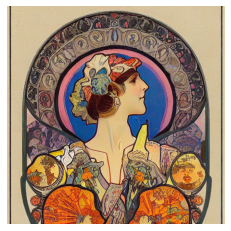

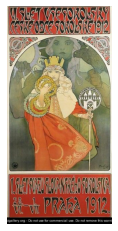

0
Similarity = tensor([[0.8143]])


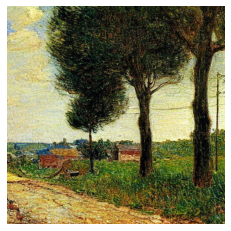

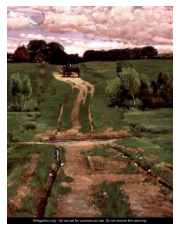

1
Similarity = tensor([[0.7283]])


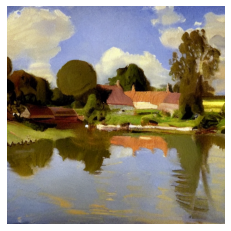

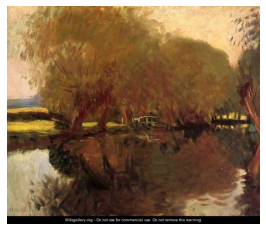

2
Similarity = tensor([[0.8322]])


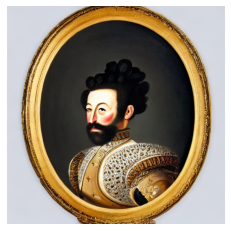

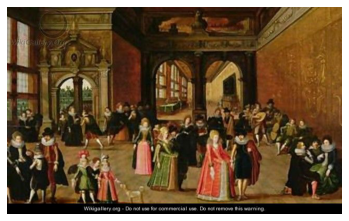

3
Similarity = tensor([[0.6007]])


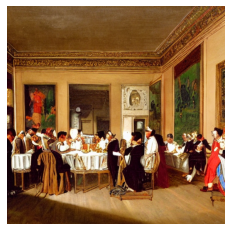

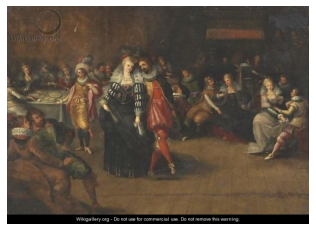

4
Similarity = tensor([[0.7275]])


In [ ]:
#@title Run
similarity=np.zeros(len(generated))
for i in range(len(generated)):
  #display_artwork(generated.url.values[i])
  #display_artwork(artworks.image_url.values[generated.source_artwork[i]])
  print(i)
  similarity[i]=image_to_image_similarity(model, preprocess, image_artwork(generated.url.values[i]), image_artwork(artworks.image_url.values[generated.source_artwork[i]])) 

## Filtering out Black-colored images

***The*** data_pair table is the result of an inner join between the original artworks relation and the generated artwork relation with the key of the artwork id, which happens to be the same for both.



In [ ]:
generated_similarity = generated
generated_similarity['similarity'] = similarity

In [ ]:
data_pair = pd.merge(artworks,
                 generated_similarity,
                 left_on='id', right_on='source_artwork',
                 how='inner')

After that, the Black-colored would be flagged

In [ ]:
data_ai_url = data_pair.url_y
data_ai_url = data_ai_url.str.replace(' ','%20')
counter=0
for i in data_ai_url:
  response = requests.get(i)
  image = Image.open(io.BytesIO(response.content))
  extrema = image.convert("L").getextrema() #https://stackoverflow.com/questions/14041562/python-pil-detect-if-an-image-is-completely-black-or-white
  if extrema==(0,0):
    data_pair.loc[counter,'colorval']='Black'
  else: data_pair.loc[counter,'colorval']='Non-black'
  counter=counter+1

In [ ]:
Nonblack_similarity_artist = data_pair.loc[data_pair.colorval == "Non-black", ["source_artwork", "artist", "similarity"]]

## Merging similarities and Artist&Movements&Specializations

---




Join data_pair table with movement table and specialization table





In [ ]:
similarity_movement = Nonblack_similarity_artist.merge(artistmovements, 
                                                       left_on = "artist",
                                                       right_on = "artist_id",
                                                       how = "right")
similarity_movement = similarity_movement.merge(movement[["id", "name"]],
                                                left_on = "movement_id",
                                                right_on = "id",
                                                how = "left") 

In [ ]:
similarity_movement

In [ ]:
similarity_specialization = Nonblack_similarity_artist.merge(artistspecializations, 
                                                       left_on = "artist",
                                                       right_on = "artist_id",
                                                       how = "right")
similarity_specialization = similarity_specialization.merge(specialization[["id", "name"]],
                                                            left_on = "specialty_id",
                                                            right_on = "id",
                                                            how = "left")

In [ ]:
similarity_specialization

# Visualization

In this step, the boxplot of similarity for each type of movement and specialization would be presented.


In [ ]:
fig = px.box(similarity_movement, x="name", y="similarity", points="all")
fig.show()

In [ ]:
fig = px.box(similarity_specialization, x="name", y="similarity", points="all")
fig.show()